### 1 Loading Dataset

In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
import random

from models.my_datasets import MyDataset2
from models.my_models_CNN import MyModel_CNN
#from models.my_models_vgg16 import MyModel_CNN


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(device)

True
cuda:0


In [4]:
'''
ROOT = './output/town04_image_data/images/'
OUT = './output/town04_image_data/smallimages/'
SIZE = (400,300)
image_paths = os.listdir(ROOT)
image_paths.sort()
for im in image_paths:
    #print(im)
    img = cv2.imread(ROOT+im)
    img = cv2.resize(img, SIZE,  interpolation = cv2.INTER_AREA)
    cv2.imwrite(OUT+im, img)
'''

"\nROOT = './output/town04_image_data/images/'\nOUT = './output/town04_image_data/smallimages/'\nSIZE = (400,300)\nimage_paths = os.listdir(ROOT)\nimage_paths.sort()\nfor im in image_paths:\n    #print(im)\n    img = cv2.imread(ROOT+im)\n    img = cv2.resize(img, SIZE,  interpolation = cv2.INTER_AREA)\n    cv2.imwrite(OUT+im, img)\n"

In [5]:
'''
#### delete the data for the unstored images
ROOT = './output/town04_image_data/'
out = open(ROOT+"alldata.txt",'w')
lines=[]
with open(ROOT+"offdata_image.txt", 'r') as infile:
    for line in infile:
        line = line.rstrip()
        words = line.split()
        img = cv2.imread(ROOT+words[0])
        if img is None:
            pass
        else:
            out.write(line)
            out.write('\r\n')
out.close()
'''

'\n#### delete the data for the unstored images\nROOT = \'./output/town04_image_data/\'\nout = open(ROOT+"alldata.txt",\'w\')\nlines=[]\nwith open(ROOT+"offdata_image.txt", \'r\') as infile:\n    for line in infile:\n        line = line.rstrip()\n        words = line.split()\n        img = cv2.imread(ROOT+words[0])\n        if img is None:\n            pass\n        else:\n            out.write(line)\n            out.write(\'\r\n\')\nout.close()\n'

In [6]:
'''
#### conpute the delta imformation from the original information
ROOT = './output/town04_image_data/'
out = open(ROOT+"delta.txt",'w')
delta_data = np.empty((0,3))
with open(ROOT+"data_image_all.txt", 'r') as infile:
    for line in infile:
        line = line.rstrip()
        words = line.split()
        newline = np.array([[float(words[1])-float(words[2]), float(words[3]), float(words[4])]])
        delta_data = np.append(delta_data, newline, axis=0)
        
np.set_printoptions(threshold = np.inf)
out.write(str(repr(np.array(delta_data))))
out.close()
'''

'\n#### conpute the delta imformation from the original information\nROOT = \'./output/town04_image_data/\'\nout = open(ROOT+"delta.txt",\'w\')\ndelta_data = np.empty((0,3))\nwith open(ROOT+"data_image_all.txt", \'r\') as infile:\n    for line in infile:\n        line = line.rstrip()\n        words = line.split()\n        newline = np.array([[float(words[1])-float(words[2]), float(words[3]), float(words[4])]])\n        delta_data = np.append(delta_data, newline, axis=0)\n        \nnp.set_printoptions(threshold = np.inf)\nout.write(str(repr(np.array(delta_data))))\nout.close()\n'

In [7]:
#preprocess the txt file
ROOT = './output/town04_data/trajectory1_pjx/'
train_out = open(ROOT+"traindata_shuffle.txt",'w')
val_out = open(ROOT+"valdata_shuffle.txt",'w')
over_out = open(ROOT+"overdata_shuffle.txt",'w')
lines=[]
with open(ROOT+"data_all.txt", 'r') as infile:
    for line in infile:
        lines.append(line)
    random.shuffle(lines)
    num_train = np.ceil(0.8*len(lines))
    for count, line in enumerate(lines):
        if count <=num_train:
            if count>=25 and count<=35:
                print(line)
                over_out.write(line)
            train_out.write(line)
        else:
            val_out.write(line) 
train_out.close()            
val_out.close()
over_out.close()        

images_off/traj2_000400_06_14.png -242.4651336669922 -89.66815948486328 2.9370048902243795 9.82763165797355 -232.04872131347656 -91.74087524414062 2.9605392447774106 10.110875254337783 0.3203449918246954 -0.026774356665906118

images_off/traj1_000350_06_20.png 60.16181564331055 -365.4378356933594 2.5680950275950067 4.938781917230327 67.0915298461914 -369.4236755371094 2.6588768628336275 6.442531880363426 5.781098062571181e-15 -0.032447193974995375

images_off/traj2_000440_07_07.png -267.2572021484375 -85.60802459716797 3.031147634758681 4.946451463651957 -260.1221923828125 -86.26103973388672 -3.057859939440503 5.500541389535576 4.212148376172911e-06 -0.4359970948803277

images_off/traj1_000890_01_12.png -234.5464630126953 -95.35982513427734 2.845401736105578 9.830406107899563 -222.01995849609375 -98.53285217285156 2.914413827329456 10.164826953402173 0.9999999999999976 -0.011167870484469366

images_off/pjx_1_000240_09_06.png 331.8236389160156 -336.22998046875 0.6792986910960457 4.93782

In [8]:
TRANSFORM = cv2.resize
SIZE = (200,150)
over_data = MyDataset2(root = ROOT, txtname = 'overdata_shuffle.txt', transform=TRANSFORM, size=SIZE)
train_data = MyDataset2(root = ROOT, txtname = 'traindata_shuffle.txt' , transform = TRANSFORM, size= SIZE)
val_data = MyDataset2(root = ROOT, txtname = 'valdata_shuffle.txt', transform = TRANSFORM, size= SIZE)
over_loader = DataLoader(dataset=over_data, batch_size=32, shuffle=True)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=32, shuffle=True)
print("Overfit size: %i" % len(over_data))
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))

Overfit size: 11
Train size: 50472
Validation size: 12616


In [9]:
print(over_data[0][0][0].shape)
cv2.imshow('Window',over_data[0][0][0])
cv2.waitKey(0)
cv2.destroyAllWindows()

(150, 200, 3)


### 2 Defining Neural Network

In [10]:
mynet= MyModel_CNN().to(device)
print(mynet)

MyModel_CNN(
  (features): Sequential(
    (0): Conv2d(3, 30, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(30, 60, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(60, 60, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (predict): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=372, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [11]:
total_params = sum(p.numel() for p in mynet.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in mynet.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} trainable parameters.')

61,562 total parameters.
61,562 trainable parameters.


### 3 Training Neural network

In [12]:
mycriterion = nn.MSELoss(reduction='mean') 
myoptimizer = optim.Adam(mynet.parameters(), lr=1e-6, eps = 1e-08) 

In [13]:
def run_epoch(model,criterion,optimizer,dataloader,iftrain):    
    running_loss = 0.0  
    
    #Iterating through the minibatches of the data
    for i, data in enumerate(dataloader, 0): 
        X, y = data
        X = [x.cuda() for x in X]
        y = y.to(device)
        #Y = [y.cuda() for y in Y]
        #X = torch.tensor(X)
        #Y = torch.as_tensor(np.array(Y))
        #print(X.shape,y.shape)
        if iftrain:  
            optimizer.zero_grad()
            y_pred = model(X)
            y_pred = y_pred.float()
            #print(y)
            #print(y_pred)
            y = y.float()
            loss = criterion(y_pred, y)  
            loss.backward()             
            optimizer.step()            
            running_loss += loss.item() 
            #print('x', X[1])
            #print('prediction', y_pred)
            #print('gt', y)
        else:
            y_pred = model(X)
            y_pred = y_pred.float()  
            y = y.float()
            loss = criterion(y_pred , y)  
            running_loss += loss.item()    
    return running_loss    

In [14]:
# test if the model will overfit with only one sample
max_epochs = 200
train_history = []
val_history = []
myoptimizer = optim.Adam(mynet.parameters(), lr=1e-4, eps = 1e-08) 
scheduler = optim.lr_scheduler.CosineAnnealingLR(myoptimizer, max_epochs)
for epoch in range(max_epochs):
    '''
    if epoch >= 1999 and epoch <= 2999:
        myoptimizer.param_groups[0]['lr'] = 1e-5
    elif epoch > 2999:
        myoptimizer.param_groups[0]['lr'] = 1e-6
        
    scheduler.step()
    '''
    train_loss = run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=over_loader,
                           iftrain=True)
    train_history.append(train_loss)
    val_loss =  run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=over_loader,
                           iftrain=False)
    val_history.append(val_loss)
    if epoch % 10 == 9:
        print(f"Epoch {epoch + 1: >3}/{max_epochs}, train_loss: %2e, val_loss: %2e "% 
          (train_loss, val_loss))
        #print(scheduler.get_last_lr())

Epoch  10/200, train_loss: 3.043734e-01, val_loss: 1.799065e-01 
Epoch  20/200, train_loss: 1.130993e-01, val_loss: 6.657188e-02 
Epoch  30/200, train_loss: 4.612103e-02, val_loss: 3.384228e-02 
Epoch  40/200, train_loss: 2.034618e-02, val_loss: 2.277463e-02 
Epoch  50/200, train_loss: 1.331364e-02, val_loss: 1.297989e-02 
Epoch  60/200, train_loss: 5.225585e-03, val_loss: 4.366772e-03 
Epoch  70/200, train_loss: 2.193859e-03, val_loss: 1.960634e-03 
Epoch  80/200, train_loss: 5.970253e-04, val_loss: 6.419891e-04 
Epoch  90/200, train_loss: 1.523279e-04, val_loss: 1.411553e-04 
Epoch 100/200, train_loss: 3.335633e-05, val_loss: 2.441728e-05 
Epoch 110/200, train_loss: 8.535954e-06, val_loss: 6.731830e-06 
Epoch 120/200, train_loss: 3.333519e-06, val_loss: 3.827747e-06 
Epoch 130/200, train_loss: 1.423123e-06, val_loss: 2.064823e-06 
Epoch 140/200, train_loss: 7.955385e-07, val_loss: 8.119788e-07 
Epoch 150/200, train_loss: 3.667882e-07, val_loss: 2.300819e-07 
Epoch 160/200, train_loss

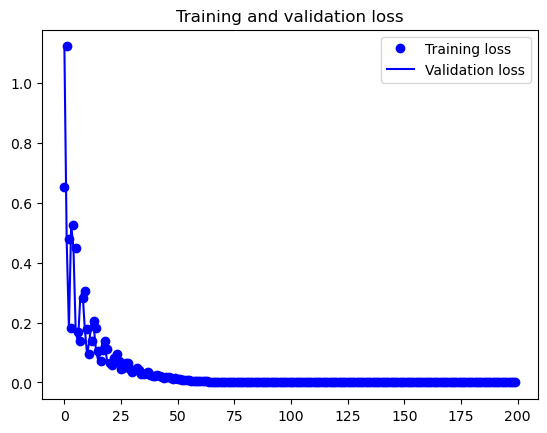

In [15]:
# plot the train&validation loss curve with only one sample
epochs = range(len(train_history))
plt.figure()
plt.plot(epochs, train_history, 'bo', label='Training loss')
plt.plot(epochs, val_history, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [18]:
mynet.eval()
TEST = random.randint (0, 11)
test_in, gt_output = over_data[TEST]
test_in = [torch.tensor(x).cuda() for x in test_in]
#gt_output = torch.tensor(gt_output).to(device)
output_pred = mynet(test_in) 
#print('TEST', TEST)
print('test_in',test_in[1])
print('prediction:{}, ground truth:{}'.format(output_pred.cpu().detach().numpy(), gt_output))

test_in tensor(4.9391, device='cuda:0')
prediction:[[-3.0443072e-05 -4.2698950e-02]], ground truth:[ 3.35533028e-15 -4.27261526e-02]


In [19]:
# start the main training process

num_trainbatch = np.ceil(len(train_data)/32) 
num_valbatch = np.ceil(len(val_data)/32) 
train_history = []
val_history = []

min_loss = 100000
current_patience = 0
patience = 5



In [21]:
myoptimizer = optim.Adam(mynet.parameters(), lr=5e-4, eps = 1e-08) 
max_epochs = 10
print('Start training!')
for epoch in range(max_epochs): 
    
    if epoch > 9 and epoch <= 14:
        myoptimizer.param_groups[0]['lr'] = 1e-5
    elif epoch > 19:
        myoptimizer.param_groups[0]['lr'] = 1e-6
    
    train_loss = run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=train_loader,
                           iftrain=True)
    train_history.append(train_loss/num_trainbatch)
    val_loss =  run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=val_loader,
                           iftrain=False)
    val_history.append(val_loss/num_valbatch)
    #if epoch % 100 == 99:
    print(f"Epoch {epoch + 1: >3}/{max_epochs}, train_loss: %e, val_loss: %e "% 
      (train_loss/num_trainbatch, val_loss/num_valbatch))
'''
    # early stopping
    if min_loss == 100000 or val_loss < min_loss :
        min_loss = val_loss
        current_patience = 0
        torch.save(mynet.state_dict(),'mynet.pth')
      
    else :
        current_patience += 1 
        if current_patience >= patience :
            print("Stopping early at epoch {}!".format(epoch+1)) 
            break   '''

print('FINISH.')

Start training!
Epoch   1/10, train_loss: 6.389668e-02, val_loss: 7.809505e-02 
Epoch   2/10, train_loss: 6.052549e-02, val_loss: 7.693707e-02 


KeyboardInterrupt: 

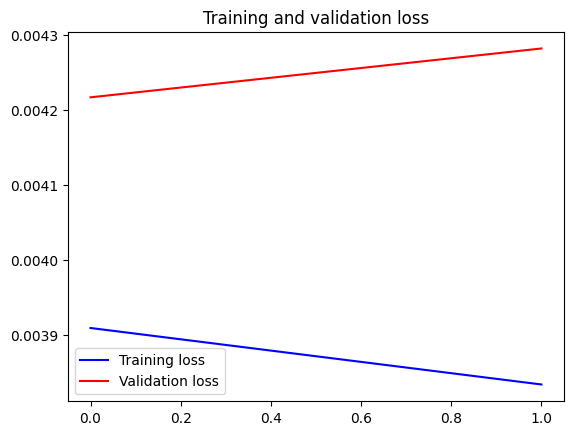

In [22]:
# plot the train&validation loss curve 
epochs = range(len(train_history))
plt.figure()
plt.plot(epochs, train_history, 'b', label='Training loss')
plt.plot(epochs, val_history, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()


In [25]:
# save trained model
torch.save(mynet.state_dict(),'./models/mynet_small_1.pth')

In [15]:
mynet.load_state_dict(torch.load('./models/mynet_alexnet_all_4.pth'))

<All keys matched successfully>

In [19]:
for i in range (21):
    TEST = random.randint (0, 2900)
    test_in, gt_output = val_data[TEST]
    test_in = [torch.tensor(x).cuda() for x in test_in]
    gt_output = torch.tensor(gt_output).to(device)
    output_pred = mynet(test_in) 
    #print('TEST', TEST)
    #print('test_in',test_in)
    print('prediction:{}, ground truth:{}'.format(output_pred.cpu().detach().numpy(), gt_output.cpu().detach().numpy()))

prediction:[[1.0451425  0.05493085]], ground truth:[1.         0.05130721]
prediction:[[ 1.0106381 -0.3864771]], ground truth:[ 1.        -0.3706857]
prediction:[[ 4.1950214e-01 -2.6309118e-04]], ground truth:[ 0.47017243 -0.04200191]
prediction:[[ 0.05943284 -0.02394141]], ground truth:[ 4.09873380e-13 -5.81281568e-02]
prediction:[[0.3540799  0.02195956]], ground truth:[0.35644556 0.00636777]
prediction:[[0.41602182 0.06518103]], ground truth:[0.4249547  0.05413849]
prediction:[[1.0684751  0.06621121]], ground truth:[1.         0.01296327]
prediction:[[-0.03565545 -0.09232545]], ground truth:[ 4.94692660e-13 -4.96037369e-02]
prediction:[[ 1.0412581  -0.02417692]], ground truth:[ 1.         -0.00370599]
prediction:[[0.9985546  0.23713678]], ground truth:[0.99996426 0.22649477]
prediction:[[0.3921817  0.02228834]], ground truth:[3.57651344e-01 4.26219437e-05]
prediction:[[0.29400325 0.01852754]], ground truth:[ 0.28448046 -0.0015667 ]
prediction:[[ 0.9948844 -0.9880783]], ground truth:[